<h1><font color="#999999" size=5>Análisis predictivo con Deep Learning</font></h1>

__________________________


<h1><font color="#113D68" size=6>Caso Práctico: Análisis problema de clasificación con Deep Learning</font></h1>
<br>
<div style="text-align: left">
<font size=3>Profesor: Daniel González</font><br>
<font size=3>Alumno: Xavier Torres</font><br>
<font size=3>Semana 4: Caso práctico</font><br>
<font size=3>IEBS</font>
</div>
<img src="https://i2.wp.com/py2py.com/wp-content/uploads/2019/02/Screenshot-2019-02-05-at-5.39.05-AM.png?fit=703%2C422&ssl=1"  align="center">



---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [Caso práctico](#section1)
    - [Parte obligatoria](#section1.1)
    - [Parte opcional](#section1.2)
    - [Objetivos](#section1.3)
    - [Criterios de entrega](#section1.4)
    - [Temporalización](#section1.5)
* [CIFAR10 Dataset](#section2)
* [Experimentos con redes neuronales densas](#section3)
    - [Experimento 1](#section3.1)
    - [Experimento 2](#section3.2)
* [Experimentos con CNNs](#section4)
    - [Experimento 3](#section4.1)
    - [Experimento 4](#section4.2)
* [Experimento Opcional](#section5)
    - [Experimento opcional 1](#section5.1)
    - [Experimento opcional 2](#section5.2)
    - [Experimento opcional 3](#section5.3)
    - [Experimento opcional 4](#section5.4)

* [Conclusión](#section6)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Anaconda fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

<a id="section1"></a>
# <font color="#004D7F" size=5>Caso práctico</font>

El objetivo de este caso práctico es simular como se haría un análisis completo de un problema para resolverlo con Deep Learning. Nos pondremos en la piel de un *data scientist* dedicado a analizar y crear modelos de Deep Learning para pasarlos a producción y ser desplegados en una aplicación.

Imaginemos que tenemos un dataset completo que queremos explotar, nuestra labor será coger este dataset de imágenes (CIFAR10) y realizar varios experimentos con distintas redes para descubrir cual funciona mejor y cual elegimos para pasar a producción. Por lo que además de tener que entrerar distintas redes y entender qué ha pasado en cada entrenamiento explicando el resultado, al final deberemos justificar cual de todos los modelos entrenados es el más óptimo para pasar a producción.

Cada experimento que tendremos que realizar estará bien definido, la red que deberéis crear y entrenar será proporcinada por lo que solamente tendréis que crear la red que se nos indica con TensorFlow y realizar el entrenamiento de la misma. Por cada experimento deberéis de sacar conclusiones de cómo de bueno o malo ha sido ese entrenamiento. Al final de todos los experimentos, deberemos de generar una pequeña documentación donde justificamos cual de los modelos entrenados es el más óptimo para pasar a producción.

<a id="section1.1"></a>
# <font color="#004D7F" size=4>Parte obligatoria</font>

Será obligatorio realizar cada uno de los experimentos que están definidos. En cada experimento está definida la red que se tiene que crear y la configuración con la que se tiene que entrenar, por lo que solamente tendréis que pasar esa definición a código con TensorFlow. Al finalizar cada experimento se deberá genera una pequeña documentación explicando cómo ha sido el entrenamiento y sacando conclusiones de los resultados.

Al final, después de realizar cada uno de los experimentos, se deberá de generar una pequeña documentación justificando cual de los modelos entreados es el óptimo para ser desplegado en producción.

Es muy importante destacar que el objetivo de este caso práctico no es que obtengáis unos resultados muy buenos, de echo los resultados que obtendréis son los pre-definidos por las redes que tenéis que hacer. El objetivo principal es que veáis como se aborda un problema para ser resuelto con Deep Learning, donde partimos de un dataset y un objetivo, y vamos realizando diferentes experimentos hasta encontrar la solución más óptima que podemos llegar a desplegar en producción. Además, otro objetivo es que entendáis que estáis haciendo y los resultados que obtenéis con cada experimento: sin son buenos o malos, si hay sobreajuste en los datos de entrenamiento, si nuestra red no termina por aprender, si nuestra red se estanca en algún punto y ya no aprende más, etc.

Para tener una buena práctica en la realización de este caso práctico se ofrecen esta recomendaciones:

- Utiliza correctamente el sistema de celdas de jupyter. La libreta está realizada de tal forma que solo tendréis que completar las celdas que se indican, ya sea con código o con texto en markdown. Se recomienda rellenar solamente las celdas indicadas para que quede un informe limpio y fácil de seguir. Si fuera necesario incluir más celdas por cualquier motivo se puede hacer pero realizarlo con cuidado para no ensuciar demasiado la libreta.
<br><br>
- Las redes que tendréis que crear en cada experimento son las vistas en clase, por lo que os podéis inspirar en los ejemplos vistos en los tutoriales. Os recomiendo que no copiéis y peguéis código tal cual, sino que lo escribáis por vuestra cuenta y entendáis lo que estáis haciendo en cada momento. Tomaros el tiempo que haga falta para entender cada paso.
<br><br>
- Comprueba que todo se ejecuta correctamente antes de enviar tu trabajo. La mejor forma de enviarlo es exportando la libreta a pdf o html para enviarla en un formato más profesional.


<a id="section1.2"></a>
# <font color="#004D7F" size=4>Parte opcional</font>
La parte opcional se trata de que vosotros creéis vuestra propia red neuronal para obtener mejores resultados que los de la parte obligatoria. Obviamente no es obligatorio conseguir mejores resultados. Se os indicarán algunan pautas adicionales para poder crear vuestra propia red de la nada. ¡Esta parte podéis verla como un reto!

<a id="section1.3"></a>
# <font color="#004D7F" size=4>Objetivos</font>
* Cargar y entender los datos del dataset CIFAR10 con los que se trabajarán.
* Crear cada una de las redes indicadas en los experimentos.
* Entrenar cada una de las redes creadas en los experimentos.
* Escribir un pequeño texto explicando el resultado de cada entrenamiento.
* Escribir un pequeño texto de conclusión al final del cuaderno justificando el modelo elegido para desplegar.

<a id="section1.4"></a>
# <font color="#004D7F" size=4>Criterios de entrega</font>
Se deberá entregar una libreta de jupyter en formato html o pdf, el trabajo debe estar autocontenido, incluyendo código y texto explicativo para cada sección. 

<a id="section1.5"></a>
# <font color="#004D7F" size=4>Temporalización</font>
* Fase 1: Instala y familiarizate con todo el entorno de trabajo.
* Fase 2: Cargar los datos y familizarizarse con ellos.
* Fase 3: Realizar cada uno de los experimentos indicados.
* Fase 4: Escribir un texto de conclusión al final.

<a id="section2"></a>
# <font color="#004D7F" size=5>CIFAR10 dataset</font>

Este dataset es el que hemos visto en la clase anterior y con el que trabajaremos en el caso práctico. Para refresarlo, es un dataset que contiene imágenes en color de objetos que tenemos que clasificar.

El dataset de de imágenes CIFAR10 tiene las siguintes características:
- Imágenes de 10 tipos de objetos: aviones, automóbiles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones.
- Imágenes en color, es decir, cada pixel tiene 3 valores entre 0 y 255, esos valores corresponden a los valores de RGB (Red, Green, Blue).
- Imágenes de tamaño 32x32x3, 32x32 píxeles y 3 valores por pixel.
- 50.000 imágenes para el entrenamiento y 10.000 imágenes para el test.

<br><br>
<img src="images/rgb-image.png" align="center" width="400">

Para empezar debemos descargar los datos de las bases de datos de Tensorflow.

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Normalizamos los valores entre 0 y 1.

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### COMPLETAR: familiarizate con el dataset accediendo a los elementos, viendo los tamaños, los valores, etc.

In [4]:
print("Num training images: ", x_train.shape)
print("Num test images: ", x_test.shape)
print("Dimension input: ", x_train.shape)
print("Dimension output: ", y_train.shape)
print("Output example: ", y_train[298])

Num training images:  (50000, 32, 32, 3)
Num test images:  (10000, 32, 32, 3)
Dimension input:  (50000, 32, 32, 3)
Dimension output:  (50000, 1)
Output example:  [6]


In [21]:
def show_images(images):
    fig=plt.figure(figsize=(10, 10))
    index = np.random.randint(len(images), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        color = None
        plt.imshow(images[index[i]].reshape([32, 32, 3]), cmap=color)
    plt.show()

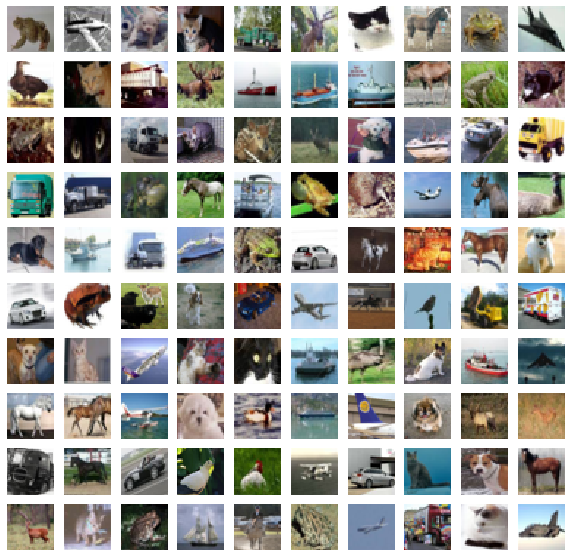

In [22]:
show_images(x_train)

<a id="section3"></a>
# <font color="#004D7F" size=5>Experimentos con redes neuronales densas</font>
A continuación, realizar 2 experimentos usando redes neuronales densas con las redes que se te indican en cada sección.

<a id="section3.1"></a>
# <font color="#004D7F" size=4>Experimento 1</font>

Arquitectura de la red:

- Capa de aplanado `Flatten` con entrada `(32,32,3)`
- Capa densa `Dense` con 10 neuronas y función de activación _ReLU_
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.01
- Función de error: `sparce_categorical_crossentropy`
- Métricas: `accuracy`
- Número de *epochs*: 20

#### COMPLETAR: crear y entrena la red neuronal indicada arriba

In [70]:
#definir la arquitectura  de la red:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#definir el optimizador y configurar el entrenamiento
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# entrenal el modelo
hist = model.fit(x = x_train,
                y = y_train,
                validation_data = (x_test,y_test),
                epochs = 20)
model.save('Model_Experimento01.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 113us/sample - loss: 2.3119 - accuracy: 0.1020 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 2/20
50000/50000 [==============================] - 4s 78us/sample - loss: 2.3039 - accuracy: 0.1011 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 3/20
50000/50000 [==============================] - 4s 77us/sample - loss: 2.3040 - accuracy: 0.0988 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 4/20
50000/50000 [==============================] - 4s 71us/sample - loss: 2.3040 - accuracy: 0.0996 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 5/20
50000/50000 [==============================] - 4s 76us/sample - loss: 2.3041 - accuracy: 0.0991 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/20
50000/50000 [==============================] - 4s 80us/sample - loss: 2.3041 - accuracy: 0.1006 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 7/20
50000/50000 [==============================]

In [12]:
def model_charts():
    # Gráficos para evaluar el  modelo. Parte 1:
    fig=plt.figure(figsize=(70, 50))

    # error
    fig.add_subplot(10, 10, 1)
    plt.plot(hist.history['loss'], label='train_loss')
    plt.plot(hist.history['val_loss'], '--.', label='val_loss')
    plt.xlabel('EPOCH')
    plt.ylabel('LOSS')
    plt.grid(axis=('x'))
    plt.grid(axis=('y'))
    plt.legend()

    # precision
    fig.add_subplot(10, 10, 2)
    plt.plot(hist.history['accuracy'], label='train_accuracy')
    plt.plot(hist.history['val_accuracy'], '--.', label='val_accuracy')
    plt.xlabel('EPOCH')
    plt.ylabel('ACCURACY')
    plt.grid(axis=('x'))
    plt.grid(axis=('y'))
    plt.legend()

    plt.show()

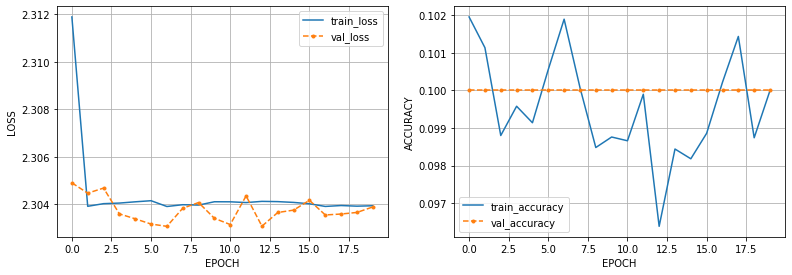

In [72]:
model_charts()

In [73]:
# Gráficos para evaluar el  modelo. Parte 2:
# Crearemos una función y definiremos un grafico con datos tabulares 
# para ver donde el modelo se está equivocando más al predecir cada una de las categorías o labels

#Creamos un array con las predicciones del x_text
prediction = model.predict(x_test).argmax(axis=1) 

#Generamos un DataFrame con los valores reales y las predicciones
df_pred = pd.DataFrame({"Observed": y_test[:,0], "Predicted": prediction}) 

#sustituimos en los datos las predicciones numéricas por su valor de texto
df_pred = df_pred.replace([0,1,2,3,4,5,6,7,8,9], labels)

df_pred.sample(10)

,Observed,Predicted
2616,automobile,airplane
6045,ship,airplane
7840,automobile,airplane
7089,horse,airplane
6369,truck,airplane
7827,cat,airplane
1000,dog,airplane
9966,frog,airplane
4180,airplane,airplane
3504,truck,airplane


In [13]:
def mapa_calor(df):

    #CREAMOS EL MAPA DE CALOR
    fig, ax = plt.subplots(figsize=(8,8))

    #We use the function crosstab in pandas to create a contingency table
    sns.heatmap(pd.crosstab(df["Observed"], df["Predicted"], values = df["Predicted"], aggfunc = "count"),
                cmap="mako_r", 
                annot=True,
                cbar_kws={'fraction' : 0.01}, # shrink colour bar
                annot_kws={"size": 12},
                fmt='g', #avoids scientific numbers like 2.1e+03 and shows it as is
                linewidth=0.01, # space between cells
                linecolor ="gray",
                ax = ax).set_xticklabels(ax.get_xticklabels());
    ax.set_title("Observed Vs Predicted", fontsize= 16);

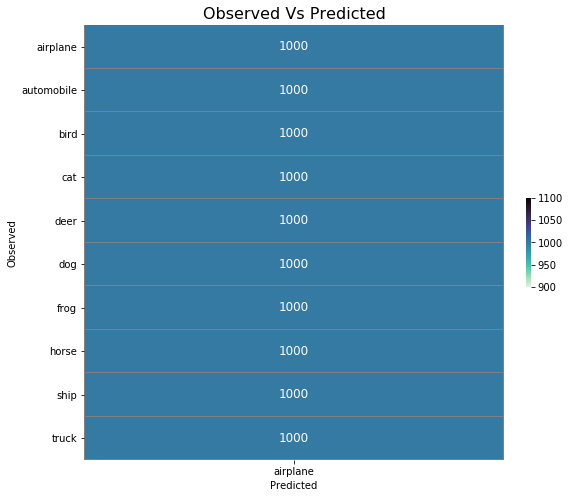

In [75]:
mapa_calor(df_pred)

#### COMPLETAR: escribe un pequeño texto con los resultado obtenidos

<font color="#339933">
Vemos que la red no está aprendiendo. Si la probabilidad de acertar aleatoriamente la clasificación es un 10% (1/10),  vemos que el 'accuracy' del set de validación no se mueve del 10% a lo largo del entrenamiento, y es que siempre está prediciendo 'airplane'. Por lo tanto, no aprende. Seguimos explorando
    
    
</font>

<a id="section3.2"></a>
# <font color="#004D7F" size=4>Experimento 2</font>

Arquitectura de la red:

- Capa de aplanado `Flatten` con entrada `(32,32,3)`.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 128 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 40

#### COMPLETAR: crear y entrena la red neuronal indicada arriba

In [57]:
#definir la arquitectura  de la red:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#definir el optimizador y configurar el entrenamiento
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# entrenal el modelo
hist = model.fit(x = x_train,
                y = y_train,
                validation_data = (x_test,y_test),
                epochs = 40)
model.save('Model_Experimento02.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 5s 105us/sample - loss: 1.9541 - accuracy: 0.2662 - val_loss: 1.8697 - val_accuracy: 0.3023
Epoch 2/40
50000/50000 [==============================] - 5s 97us/sample - loss: 1.8657 - accuracy: 0.3077 - val_loss: 1.8406 - val_accuracy: 0.3151
Epoch 3/40
50000/50000 [==============================] - 5s 95us/sample - loss: 1.8415 - accuracy: 0.3226 - val_loss: 1.8253 - val_accuracy: 0.3296
Epoch 4/40
50000/50000 [==============================] - 5s 99us/sample - loss: 1.8306 - accuracy: 0.3279 - val_loss: 1.8541 - val_accuracy: 0.3063
Epoch 5/40
50000/50000 [==============================] - 5s 99us/sample - loss: 1.8242 - accuracy: 0.3303 - val_loss: 1.8050 - val_accuracy: 0.3379
Epoch 6/40
50000/50000 [==============================] - 5s 100us/sample - loss: 1.8183 - accuracy: 0.3338 - val_loss: 1.8041 - val_accuracy: 0.3305
Epoch 7/40
50000/50000 [==============================

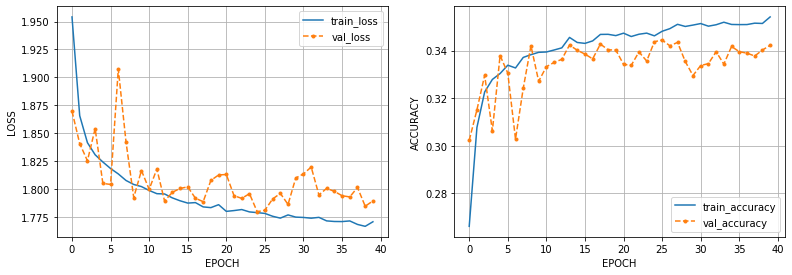

In [58]:
# Gráficos para evaluar el  modelo. Parte 1:

model_charts()

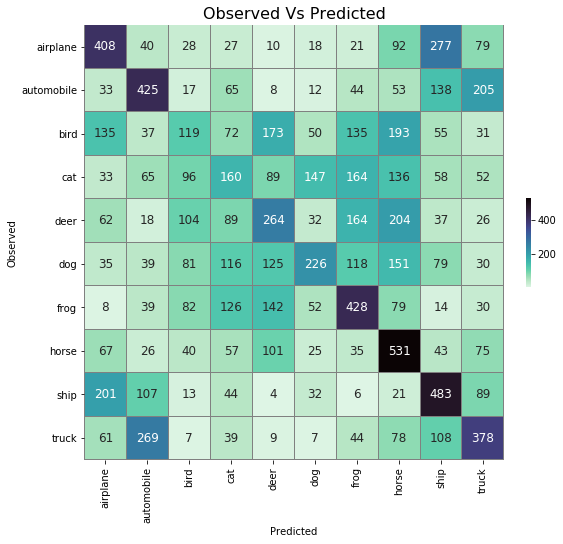

In [64]:
# Gráficos para evaluar el  modelo. Parte 2:

#Creamos un array con las predicciones del x_text
prediction = model.predict(x_test).argmax(axis=1) 

#Generamos un DataFrame con los valores reales y las predicciones
df_pred = pd.DataFrame({"Observed": y_test[:,0], "Predicted": prediction}) 

#sustituimos en los datos las predicciones numéricas por su valor de texto
df_pred = df_pred.replace([0,1,2,3,4,5,6,7,8,9], labels)


mapa_calor(df_pred)

#### COMPLETAR: escribe un pequeño texto con los resultado obtenidos

<font color="#339933">
Mejoramos respecto la red anterior, alcanzando accuracies superiores al 30% en train y test, y loss por debajo del 2, pero la red sigue sin ser muy buena predictora de estas 10 categorías. Como vemos en el mapa de calor, sólo 'horse' supera un 50% de accuracy, que de todos modos sigue siendo pobre. Seguimos explorando
    
>*Nota: Recordemos que en el test set hay 1000 imágenenes de cada tipo de objeto. Por lo tanto, si en la diagonal del heatmap vemos, por ejemplo, que horse ha tenido 531 predicted y Observed, significa que el acierto en predecir horse es del 53.1%.*
    
    
</font>

<a id="section4"></a>
# <font color="#004D7F" size=5>Experimentos con CNNs</font>
A continuación, realizar 2 experimentos usando redes convolucionales con las redes que se te indican en cada sección.

<a id="section4.1"></a>
# <font color="#004D7F" size=4>Experimento 3</font>

Arquitectura de la red:

- Capa convolucional `Conv2D` con 16 filtros/kernels, padding con relleno, activación *ReLU* y con entrada `(32,32,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.0001
- Función de error: `sparse_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 10

#### COMPLETAR: crear y entrena la red neuronal indicada arriba

In [100]:
# definimos la red
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

# definimos el optimizador y configuramos el entrenamiento (compilamos)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# compilamos el modelo
model.compile(optimizer = opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)                262208    
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                330       
Total params: 265,066
Trainable params: 265,066
Non-trainable params: 0
_______________________________________________

In [101]:
hist = model.fit(x = x_train, y = y_train,
                validation_data = (x_test, y_test),
                epochs = 10)
model.save('Model_Experimento03.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 309us/sample - loss: 1.8963 - accuracy: 0.3195 - val_loss: 1.7361 - val_accuracy: 0.3935
Epoch 2/10
50000/50000 [==============================] - 13s 265us/sample - loss: 1.6682 - accuracy: 0.4087 - val_loss: 1.6091 - val_accuracy: 0.4279
Epoch 3/10
50000/50000 [==============================] - 13s 266us/sample - loss: 1.5520 - accuracy: 0.4529 - val_loss: 1.5431 - val_accuracy: 0.4512
Epoch 4/10
50000/50000 [==============================] - 14s 271us/sample - loss: 1.4645 - accuracy: 0.4846 - val_loss: 1.4402 - val_accuracy: 0.4923
Epoch 5/10
50000/50000 [==============================] - 15s 296us/sample - loss: 1.3960 - accuracy: 0.5087 - val_loss: 1.4195 - val_accuracy: 0.4947
Epoch 6/10
50000/50000 [==============================] - 15s 295us/sample - loss: 1.3418 - accuracy: 0.5280 - val_loss: 1.3663 - val_accuracy: 0.5126
Epoch 7/10
50000/50000 [====================

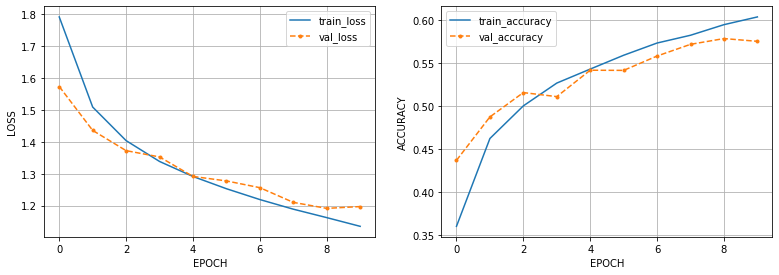

In [88]:
# Gráficos para evaluar el  modelo. Parte 1:

model_charts()

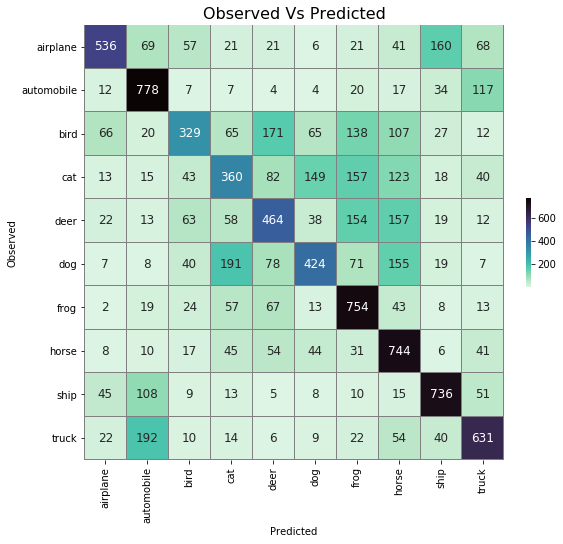

In [89]:
# Gráficos para evaluar el  modelo. Parte 2:

#Creamos un array con las predicciones del x_text
prediction = model.predict(x_test).argmax(axis=1) 

#Generamos un DataFrame con los valores reales y las predicciones
df_pred = pd.DataFrame({"Observed": y_test[:,0], "Predicted": prediction}) 

#sustituimos en los datos las predicciones numéricas por su valor de texto
df_pred = df_pred.replace([0,1,2,3,4,5,6,7,8,9], labels)


mapa_calor(df_pred)

#### COMPLETAR: escribe un pequeño texto con los resultado obtenidos

<font color="#339933">
Seguimos mejorando, alcanzando accuracies que rondan el 60% en train y test, y loss por debajo del 1.2. Como vemos en el mapa de calor, varias categorías ya superan un aceptable 70% de accuracy en la predicción ('automobile','frog', 'horse' y 'ship'). Viendo la curva de prendizaje también comprobamos que con más epochs (más entrenamiento), la red podría haber aprendido un poco más, parece que tenía más recorrido. En definitiva tenemos un 60% de accuracy que sigue siendo escaso.

<br><br>
De momento no hemos visto sobreajuste porque en ningún momento vemos que el `loss` de los datos de validación no ha echado para atrás durante el entrenamiento. Seguimos explorando.

    
</font>

<a id="section4.2"></a>
# <font color="#004D7F" size=4>Experimento 4</font>

Arquitectura de la red:

- Capa convolucional `Conv2D` con 32 filtros/kernels, padding con relleno, activación *ReLU* y con entrada `(32,32,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 64 filtros/kernels, padding con relleno y activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 64 filtros/kernels, padding con relleno y activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 20


#### COMPLETAR: crear y entrena la red neuronal indicada arriba

In [90]:
# definimos la red
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

# definimos el optimizador y configuramos el entrenamiento (compilamos)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# compilamos el modelo
model.compile(optimizer = opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1024)            

In [91]:
hist = model.fit(x = x_train, y = y_train,
                validation_data = (x_test, y_test),
                epochs = 20)
model.save('Model_Experimento04.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 43s 860us/sample - loss: 1.4781 - accuracy: 0.4617 - val_loss: 1.2082 - val_accuracy: 0.5775
Epoch 2/20
50000/50000 [==============================] - 48s 953us/sample - loss: 1.0498 - accuracy: 0.6309 - val_loss: 0.9394 - val_accuracy: 0.6672
Epoch 3/20
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.8945 - accuracy: 0.6866 - val_loss: 0.9034 - val_accuracy: 0.6875
Epoch 4/20
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.7966 - accuracy: 0.7208 - val_loss: 0.8466 - val_accuracy: 0.7096
Epoch 5/20
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.7247 - accuracy: 0.7469 - val_loss: 0.8326 - val_accuracy: 0.7137
Epoch 6/20
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.6679 - accuracy: 0.7643 - val_loss: 0.7959 - val_accuracy: 0.7307
Epoch 7/20
50000/50000 [============================

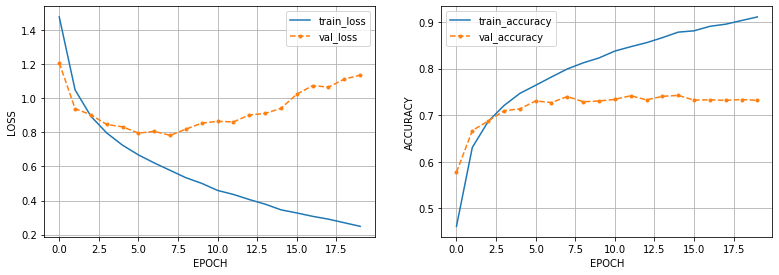

In [92]:
# Gráficos para evaluar el  modelo. Parte 1:

model_charts()

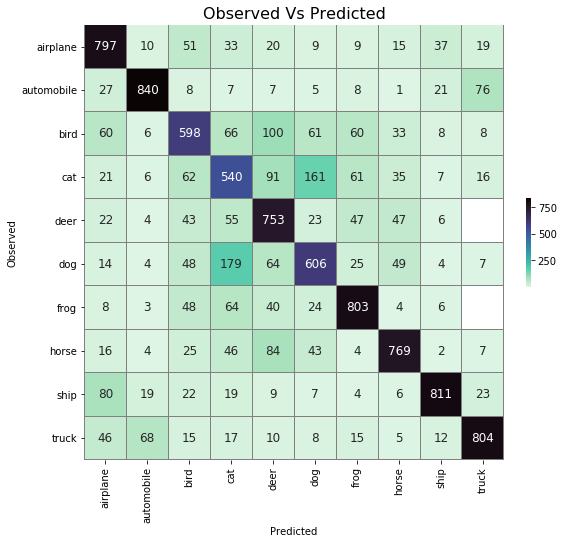

In [93]:
# Gráficos para evaluar el  modelo. Parte 2:

#Creamos un array con las predicciones del x_text
prediction = model.predict(x_test).argmax(axis=1) 

#Generamos un DataFrame con los valores reales y las predicciones
df_pred = pd.DataFrame({"Observed": y_test[:,0], "Predicted": prediction}) 

#sustituimos en los datos las predicciones numéricas por su valor de texto
df_pred = df_pred.replace([0,1,2,3,4,5,6,7,8,9], labels)


mapa_calor(df_pred)

#### COMPLETAR: escribe un pequeño texto con los resultado obtenidos

<font color="#339933">
La mejoría continua. Alcanzamos *accuracies* superiores al 90% en train y alrederor del 73% en test. En el mapa de calor observamos que ya hay muchos objetos con una accuracy decente superior al 80%.
    
<br><br>
El inconveniente es que tenemos un problema de **sobreajuste** a partir del epoch 6 en el que el loss de los datos de test empieza a crecer en lugar de decrecer.  

    
</font>

<a id="section5"></a>
# <font color="#004D7F" size=5>Parte Opcional</font>
Esta parte es totalmente opcional, se trata de realizar vuestra propia red neuronal con lo aprendido en clase para intentar mejorar lo aprendido en las anteriores redes o al menos acercarse a la red que mejor ha funcionado. El objetivo es que penséis en una posible red que creáis que puede funcionar y la pongáis en práctica para ver como funciona y expliquéis los resultados conseguido.

También os animos a que utilicéis otro tipo de capas que no hemos visto en clase (aquí tenéis todas: https://www.tensorflow.org/api_docs/python/tf/keras/layers). Y en especial os recomiendo la capa de tipo `Dropout` (podéis saber más sobre esta capa aquí y como utilizarla aquí: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

A grandes rasgos, la capa `Dropout` hace que determinadas neuronas no se activen/usen durante el proceso de entrenamiento en momentos determinados. De esta forma incitamos a que las neuronas que no aprenden tanto, lo hagan. De esta forma tenemos un entrenamiento más completo distribuido por todas las neuronas. Esta capa ayuda a evitar el problema de sobreajuste, es decir, que el entrenamiento sea demasiado ajustado al conjunto de *train* pero no sea tan óptimo en el conjunto de test.

La capa `Dropout` se suele utilizar después de las capas de *Pooling*, y el valor que se suele dar es entre 0.1 y 0.5, que es el porcentaje de neuronas de la capa anterior que de forma aleatoria no se activan para ser entrendada. Por ejemplo, una capa `Dropout` tiene este aspecto:

```
...
tf.keras.layers.Dropout(0.5)
...
```

Podéis saber más sobre este tipo de capa en este artículo: https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

<a id="section5.1"></a>
### *Prueba opcional 1*

In [20]:
# definimos la red añadiendo dos capas Dropout con 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

# definimos el optimizador y configuramos el entrenamiento (compilamos)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# compilamos el modelo
model.compile(optimizer = opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 64)         

In [97]:
hist = model.fit(x = x_train, y = y_train,
                validation_data = (x_test, y_test),
                epochs = 10)
model.save('Model_Opcional01.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.5389 - accuracy: 0.4393 - val_loss: 1.2147 - val_accuracy: 0.5653
Epoch 2/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.1643 - accuracy: 0.5879 - val_loss: 1.1610 - val_accuracy: 0.5798
Epoch 3/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.0327 - accuracy: 0.6361 - val_loss: 0.9168 - val_accuracy: 0.6743
Epoch 4/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.9414 - accuracy: 0.6664 - val_loss: 0.9332 - val_accuracy: 0.6690
Epoch 5/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.8877 - accuracy: 0.6890 - val_loss: 0.8214 - val_accuracy: 0.7150
Epoch 6/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 0.8375 - accuracy: 0.7043 - val_loss: 0.7948 - val_accuracy: 0.7192
Epoch 7/10
50000/50000 [==============================] 

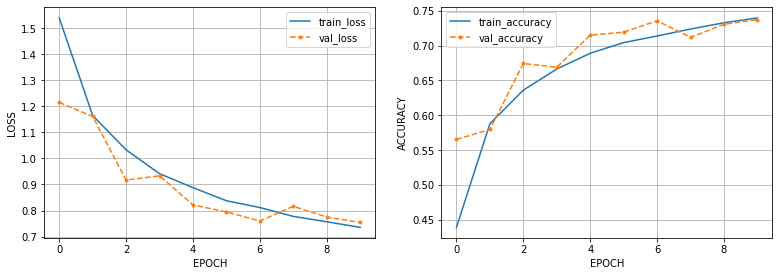

In [98]:
# Gráficos para evaluar el  modelo. Parte 1:

model_charts()

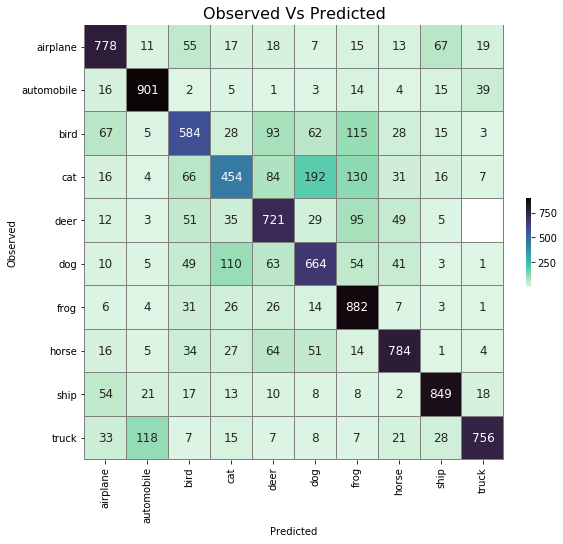

In [99]:
# Gráficos para evaluar el  modelo. Parte 2:

#Creamos un array con las predicciones del x_text
prediction = model.predict(x_test).argmax(axis=1) 

#Generamos un DataFrame con los valores reales y las predicciones
df_pred = pd.DataFrame({"Observed": y_test[:,0], "Predicted": prediction}) 

#sustituimos en los datos las predicciones numéricas por su valor de texto
df_pred = df_pred.replace([0,1,2,3,4,5,6,7,8,9], labels)


mapa_calor(df_pred)

#### Comentarios prueba opcional 1:

<font color="#339933">
Hemos reutilizado la red creada en el Experimento 4 añadiremos algunas capas de Dropout, tras el 1r y 3r pooling, y de momento solo con 10 epoch.

    
<br><br>
**Resultados**:<br>
-No hay overfitting <br>
-Accuracy del train del 74.0% , y accuracy del test del 73.7%
 
<br><br>
**Recomendación para la siguiente prueba**:<br>
    Aumentar epochs a 20, la tercera capa convolucional con 128 filtros, que la primera capa *fully_connected* sea de 256 y añadir una  segunda de 128.
    
>Nota: en el experimento 3 se probó con el optimizador `RMSprop` pero se descartó porque no mejoraba los resultados.
    
</font>

<a id="section5.2"></a>
### *Prueba opcional 2*

In [104]:
# definimos la red
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

# definimos el optimizador y configuramos el entrenamiento (compilamos)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# compilamos el modelo
model.compile(optimizer = opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 128)       

In [105]:
hist = model.fit(x = x_train, y = y_train,
                validation_data = (x_test, y_test),
                epochs = 20)
model.save('Model_Opcional02.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.5142 - accuracy: 0.4488 - val_loss: 1.1663 - val_accuracy: 0.5864
Epoch 2/20
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.1163 - accuracy: 0.6006 - val_loss: 0.9543 - val_accuracy: 0.6666
Epoch 3/20
50000/50000 [==============================] - 75s 2ms/sample - loss: 0.9673 - accuracy: 0.6570 - val_loss: 1.0092 - val_accuracy: 0.6532
Epoch 4/20
50000/50000 [==============================] - 79s 2ms/sample - loss: 0.8854 - accuracy: 0.6896 - val_loss: 0.9618 - val_accuracy: 0.6666
Epoch 5/20
50000/50000 [==============================] - 78s 2ms/sample - loss: 0.8148 - accuracy: 0.7139 - val_loss: 0.8192 - val_accuracy: 0.7131
Epoch 6/20
50000/50000 [==============================] - 78s 2ms/sample - loss: 0.7553 - accuracy: 0.7314 - val_loss: 0.7873 - val_accuracy: 0.7269
Epoch 7/20
50000/50000 [==============================] 

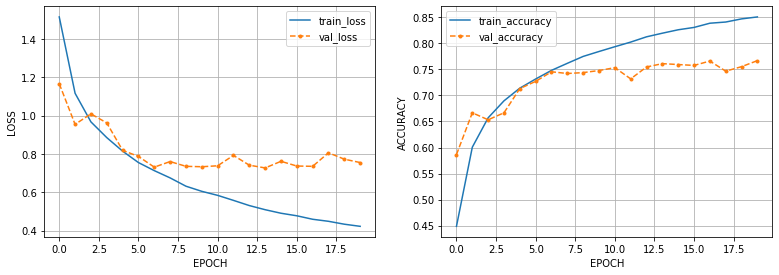

In [106]:
# Gráficos para evaluar el  modelo. Parte 1:

model_charts()

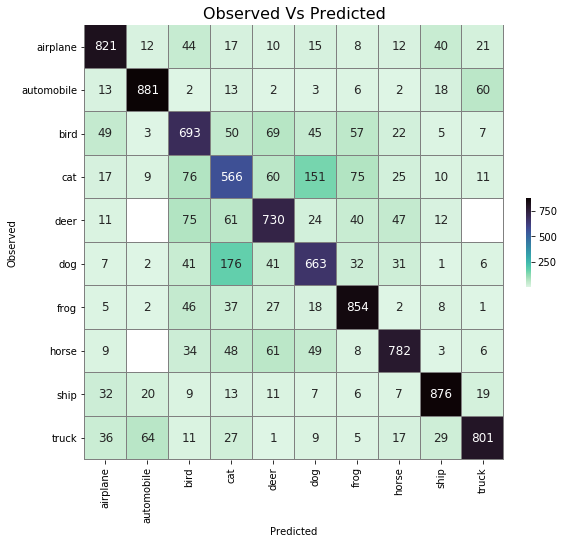

In [107]:
# Gráficos para evaluar el  modelo. Parte 2:

#Creamos un array con las predicciones del x_text
prediction = model.predict(x_test).argmax(axis=1) 

#Generamos un DataFrame con los valores reales y las predicciones
df_pred = pd.DataFrame({"Observed": y_test[:,0], "Predicted": prediction}) 

#sustituimos en los datos las predicciones numéricas por su valor de texto
df_pred = df_pred.replace([0,1,2,3,4,5,6,7,8,9], labels)


mapa_calor(df_pred)

#### Comentarios prueba opcional 2:

<font color="#339933">
Hemos reutilizado la red creada en la prueba opcional 1, aumentamos epochs a 20, la tercera capa convolucional con 128 filtros, que la primera capa <i>fully_connected</i> sea de 256 y añadir una segunda de 128.

    
<br><br>
**Resultados**:<br>
-Hay un ligero overfitting como se ve en la línea de val_loss que no termina de aprender a partir del epoch 6-7<br>
-Accuracy del train del 85% , y accuracy del test del 76.7%
 
<br><br>
**Recomendación para la siguiente prueba**:<br>
Incorporar parámetros de *early_stopping* (para que si hay overfitting el modelo pare de entrenar). Le daremos una paciencia de 15 epochs (para no perdernos posibles repuntes en el accuracy), y grabaremos el modelo con mejor `val_accuracy` (usando el parámetro `save_best_only = True`)
    
</font>

<a id="section5.3"></a>
### *Prueba opcional 3*

In [6]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [117]:
# definimos la red
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

# definimos el optimizador y configuramos el entrenamiento (compilamos)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# compilamos el modelo
model.compile(optimizer = opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 4, 4, 128)       

In [118]:
hist = model.fit(x = x_train, y = y_train,
                validation_data = (x_test, y_test),
                epochs = 20,
                callbacks=[es, mc])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49952/50000 [============================>.] - ETA: 0s - loss: 1.5561 - accuracy: 0.4283
Epoch 00001: val_accuracy improved from -inf to 0.55540, saving model to best_model.h5
50000/50000 [==============================] - 66s 1ms/sample - loss: 1.5557 - accuracy: 0.4285 - val_loss: 1.2384 - val_accuracy: 0.5554
Epoch 2/20
49984/50000 [============================>.] - ETA: 0s - loss: 1.1596 - accuracy: 0.5862
Epoch 00002: val_accuracy improved from 0.55540 to 0.62950, saving model to best_model.h5
50000/50000 [==============================] - 71s 1ms/sample - loss: 1.1598 - accuracy: 0.5862 - val_loss: 1.0424 - val_accuracy: 0.6295
Epoch 3/20
49952/50000 [============================>.] - ETA: 0s - loss: 1.0022 - accuracy: 0.6424
Epoch 00003: val_accuracy improved from 0.62950 to 0.66860, saving model to best_model.h5
50000/50000 [==============================] - 79s 2ms/sample - loss: 1.0024 - accuracy: 0.6423 - val_loss:

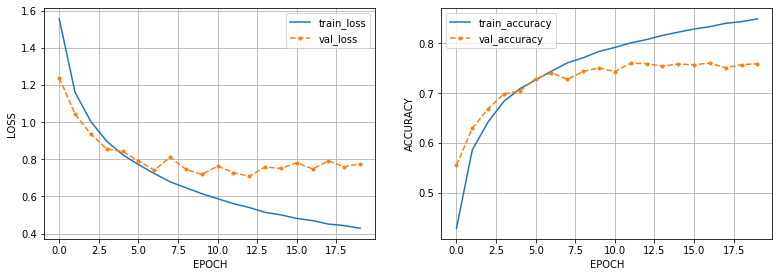

In [120]:
# Gráficos para evaluar el  modelo. Parte 1:

model_charts()

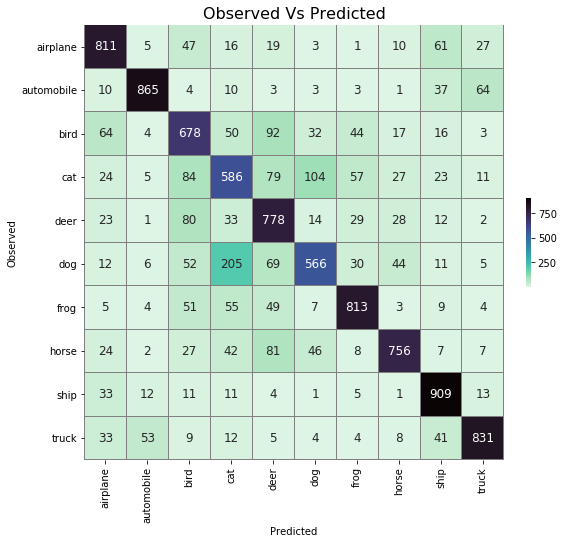

In [121]:
# Gráficos para evaluar el  modelo. Parte 2:

#Creamos un array con las predicciones del x_text
prediction = model.predict(x_test).argmax(axis=1) 

#Generamos un DataFrame con los valores reales y las predicciones
df_pred = pd.DataFrame({"Observed": y_test[:,0], "Predicted": prediction}) 

#sustituimos en los datos las predicciones numéricas por su valor de texto
df_pred = df_pred.replace([0,1,2,3,4,5,6,7,8,9], labels)


mapa_calor(df_pred)

<a id="section5.4"></a>
### *Prueba opcional 4*

Añadiremos tres capas de `Dropout` al 0.2 en lugar de 2 al 0.3, con 30 epochs, sin early_stopping y guardando el mejor modelo bajo el nombre 'best_model_v2.h5' usando `ModelCheckpoint`.

In [16]:
# definimos la red
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

# definimos el optimizador y configuramos el entrenamiento (compilamos)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# compilamos el modelo
model.compile(optimizer = opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# Creating model checkpoint without early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model_v2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)        

In [17]:
hist = model.fit(x = x_train, y = y_train,
                validation_data = (x_test, y_test),
                epochs = 30,
                callbacks=[mc])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
49984/50000 [============================>.] - ETA: 0s - loss: 1.4974 - accuracy: 0.4487
Epoch 00001: val_accuracy improved from -inf to 0.55600, saving model to best_model_v2.h5
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.4973 - accuracy: 0.4487 - val_loss: 1.2198 - val_accuracy: 0.5560
Epoch 2/30
49984/50000 [============================>.] - ETA: 0s - loss: 1.1020 - accuracy: 0.6073
Epoch 00002: val_accuracy improved from 0.55600 to 0.66220, saving model to best_model_v2.h5
50000/50000 [==============================] - 75s 2ms/sample - loss: 1.1021 - accuracy: 0.6073 - val_loss: 0.9453 - val_accuracy: 0.6622
Epoch 3/30
49984/50000 [============================>.] - ETA: 0s - loss: 0.9426 - accuracy: 0.6660
Epoch 00003: val_accuracy improved from 0.66220 to 0.69290, saving model to best_model_v2.h5
50000/50000 [==============================] - 83s 2ms/sample - loss: 0.9424 - accuracy: 0.6660 - 

Epoch 27/30
49984/50000 [============================>.] - ETA: 0s - loss: 0.3617 - accuracy: 0.8728
Epoch 00027: val_accuracy did not improve from 0.77220
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.3618 - accuracy: 0.8728 - val_loss: 0.7544 - val_accuracy: 0.7722
Epoch 28/30
49952/50000 [============================>.] - ETA: 0s - loss: 0.3518 - accuracy: 0.8764
Epoch 00028: val_accuracy did not improve from 0.77220
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.3518 - accuracy: 0.8763 - val_loss: 0.7988 - val_accuracy: 0.7666
Epoch 29/30
49984/50000 [============================>.] - ETA: 0s - loss: 0.3492 - accuracy: 0.8765
Epoch 00029: val_accuracy did not improve from 0.77220
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.3491 - accuracy: 0.8765 - val_loss: 0.7701 - val_accuracy: 0.7692
Epoch 30/30
49984/50000 [============================>.] - ETA: 0s - loss: 0.3456 - accuracy: 0.8790
Epoch 00030: val_

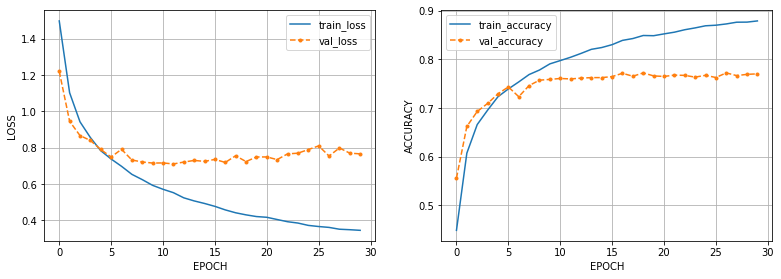

In [18]:
# Gráficos para evaluar el  modelo. Parte 1:

model_charts()

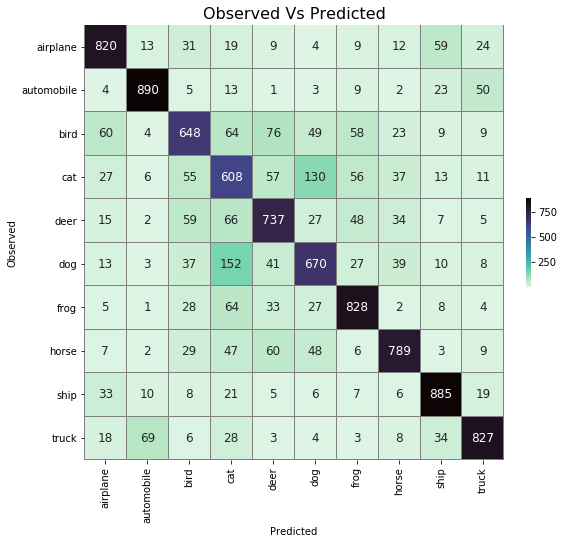

In [19]:
# Gráficos para evaluar el  modelo. Parte 2:

#Creamos un array con las predicciones del x_text
prediction = model.predict(x_test).argmax(axis=1) 

#Generamos un DataFrame con los valores reales y las predicciones
df_pred = pd.DataFrame({"Observed": y_test[:,0], "Predicted": prediction}) 

#sustituimos en los datos las predicciones numéricas por su valor de texto
df_pred = df_pred.replace([0,1,2,3,4,5,6,7,8,9], labels)


mapa_calor(df_pred)

<a id="section6"></a>
# <font color="#004D7F" size=5>Conclusión</font>
Una vez realizado todos los experimentos anteriores, ¿qué modelo elegirías para desplegar en producción? ¿Por qué? 

Explica en breves palabras qué modelo eligirías para desplegar en producción y porqué. Compara cada experimento y extrae tus propias conclusiones.

<font color="#339933">
<br><br>
<b>Resultados</b>:<br>
-Mejor resultado en epoch 19/30 de la prueba opcional num.4. <br>
-Accuracy del train del 84.90% , y accuracy del test del 77.22%

<br><br> PARA PASAR A PRODUCCIÓN, usaremos el modelo 'best_model_v2.h5' guardado en nuestro directorio gracias al parámetro `save_best_model=True`, generado en el epoch 19/30.
    
</font>

<div style="text-align: center; font-size: 24px;">
    <img src="https://i.gifer.com/8JRk.gif">
    <br>
    ¡Gracias por este módulo!
    <br><br>
</div>